# CM3060 Natural Language Processing Midterm | Jolene Goh

## 1.0 Introduction

### 1.1 Introduction to Domain-Specific Area

Fake news refers to misinformation or disinformation spread deliberately to deceive or manipulate the public opinion. This can potentially affect various sectors including politics, health and finance. For example, during the United States presidential election, fake news stories were widely circulated to manipulate voter behaviour and election results. Another example includes the spread of misinformation regarding the COVID-19 vaccines, believing they lead to severe health consequences. Lastly, fake news have the power to manipulate stock prices and markets, causing economic damage and financial losses for investors. The proliferation of fake news has become prominent in today's digital age where the increasing reliance on social media and online news platforms makes it more critical and challenging to distinguish between authentic and fake news.

### 1.2 Objectives of Project

The exploration of both statistical and embedding-based models in text classification is essential for developing effective solutions to counter the generation of fake news. The performances are evaluated using the F1 Score where computational efficiency and key features can be identified. This research aims to contribute to the field by gaining insights to produce more accurate and robust new detection systems. Further research has proven that embedding-based models often outperform statistical models when handling large and more complex datasets, though they require more computational resources (Young et al., 2018). This was evident during the training and loading processes when the computational time for embedding-based models (Word2Vec, GloVe, FastText) was significantly longer than that of statistical models.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
from joblib import Parallel, delayed
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# Import datasets
true_data = pd.read_csv("True.csv")
fake_data = pd.read_csv("Fake.csv")

[nltk_data] Downloading package stopwords to /Users/work/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1.3 Description of Selected Dataset

My selected dataset is the 'Fake and Real News' dataset taken from the Kaggle Official Website. The dataset is separated into two files, fake.csv and true.csv where they both contain text data from new articles designed specifically for training and evaluating models in the domain of fake news detection. The datasets contain four columns - title, text, subject and date (116.37MB)

In [3]:
# Print dimensionality of datasets
true_data.shape, fake_data.shape

((21417, 4), (23481, 4))

In [4]:
# Display true dataset
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
# Display fake dataset
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
# Label data class
true_data['class'] = 1
fake_data['class'] = 0

# Concatenate data
merged_data = pd.concat([true_data, fake_data], axis=0)
merged_data

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [7]:
# Shuffle data & reset index
shuffled_data = merged_data.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_data

,title,text,subject,date,class
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0
...,...,...,...,...,...
44893,Nigeria says U.S. agrees delayed $593 million ...,ABUJA (Reuters) - The United States has formal...,worldnews,"December 27, 2017",1
44894,Boiler Room #62 – Fatal Illusions,Tune in to the Alternate Current Radio Network...,Middle-east,"June 29, 2016",0
44895,ATHEISTS SUE GOVERNOR OF TEXAS Over Display on...,I m convinced the Freedom From Religion group...,Government News,"Feb 27, 2016",0
44896,Republican tax plan would deal financial hit t...,WASHINGTON (Reuters) - The Republican tax plan...,politicsNews,"November 2, 2017",1


In [8]:
# Drop irrelevant columns
data = shuffled_data.drop(['subject', 'date'], axis=1)
data

,title,text,class
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,0
...,...,...,...
44893,Nigeria says U.S. agrees delayed $593 million ...,ABUJA (Reuters) - The United States has formal...,1
44894,Boiler Room #62 – Fatal Illusions,Tune in to the Alternate Current Radio Network...,0
44895,ATHEISTS SUE GOVERNOR OF TEXAS Over Display on...,I m convinced the Freedom From Religion group...,0
44896,Republican tax plan would deal financial hit t...,WASHINGTON (Reuters) - The Republican tax plan...,1


In [9]:
# Check for null values
null_values = data.isnull().sum()
print("Checking for null values...")
print(null_values)
print()

# Check for nan values
nan_values = data.isna().sum()
print("Checking for nan values...")
print(nan_values)
print()

# Display data summary
data.info()

Checking for null values...
title    0
text     0
class    0
dtype: int64

Checking for nan values...
title    0
text     0
class    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   44898 non-null  object
 1   text    44898 non-null  object
 2   class   44898 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


### 1.4 Exploratory Data Analysis

Exploratory Data Analysis (EDA) was conducted for fake news detection, where the dataset was separated into subplots to facilitate comparison between real and fake news classes. The class distribution reveals an imbalance in the dataset which determines the best evaluation metric to be the F1 Score rather than the Accuracy Score. In this dataset, the distribution is such that fake news articles outnumber real news articles. Subsequently, the distribution of text lengths for each class was plotted. It can be observed that fake news articles tend to be longer than real new articles, highlighting the need for handling varying text lengths in the preprocessing and model selection. Following this, methods like LSTM that has the ability to effectively handle such cases may be potentially favoured.

### 1.5 Evaluation Methodology

Due to a class imbalance, the F1 Score has now become the critical evaluation metric in this analysis. As the lecturer mentioned in the DADT Midterm Webinar, it is not advised to utilise all evaluation metrics but rather, to choose one that best represents the respective methodology and employ it for comparison purposes.

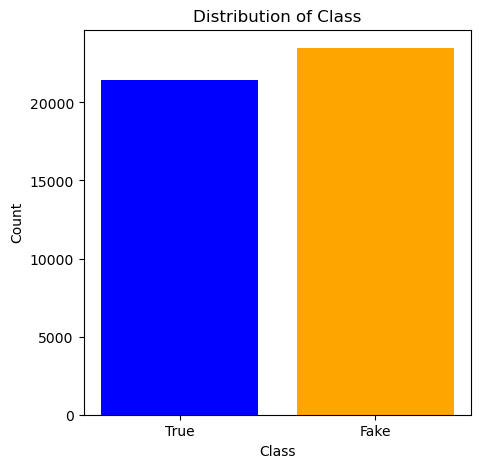

Imbalanced Dataset: F1 Score Metric


In [10]:
# Extract class count
true_len = len(true_data)
fake_len = len(fake_data)

# Display class count
plt.figure(figsize=(5, 5))
bars = plt.bar(['True', 'Fake'], [true_len, fake_len], color=['blue', 'orange'])
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Determine if dataset is balanced
if true_len == fake_len:
    print("Balanced Dataset: Accuracy Score Metric")
else:
    print("Imbalanced Dataset: F1 Score Metric")

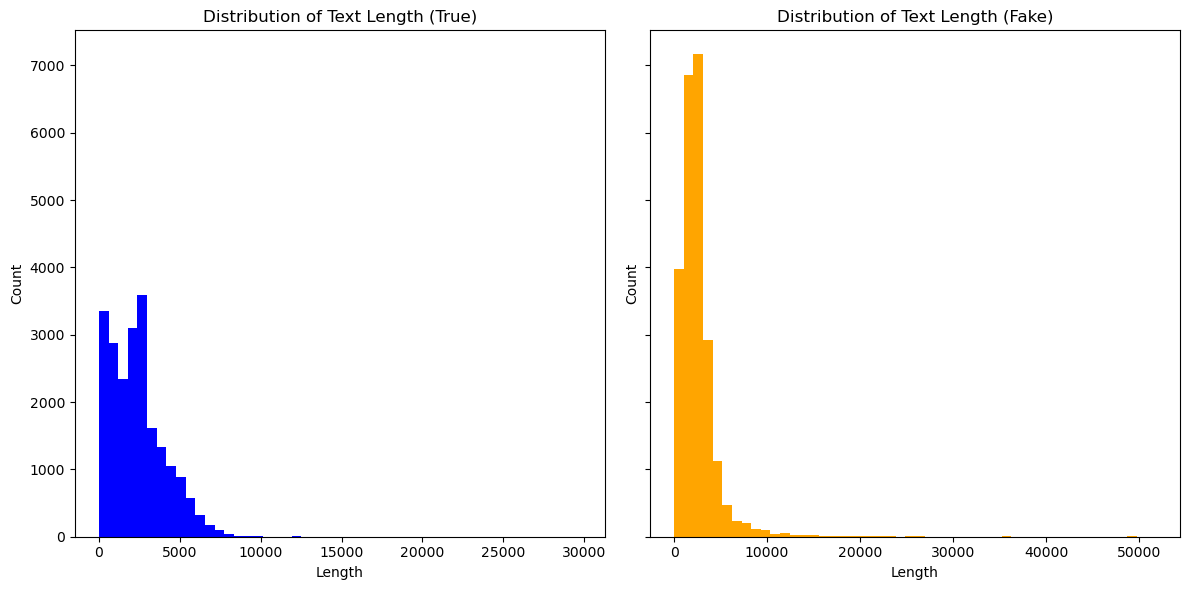

In [11]:
# Extract text length
true_text_len = true_data['text'].apply(len)
fake_text_len = fake_data['text'].apply(len)

# Display text length
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
# Display true subplot
axs[0].hist(true_text_len, bins=50, color='blue')
axs[0].set_title('Distribution of Text Length (True)')
axs[0].set_xlabel('Length')
axs[0].set_ylabel('Count')
# Display fake subplot
axs[1].hist(fake_text_len, bins=50, color='orange')
axs[1].set_title('Distribution of Text Length (Fake)')
axs[1].set_xlabel('Length')
axs[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

## 2.0 Implementation

### 2.1 Data Preprocessing

The preprocessing step involves standardising the text format using lowercase conversion, punctuation and digit removal, then individual word tokenisation with the NLTK word_tokenize() method. It undergoes stemming using the Porter Stemmer which reduces word to their base or dictionary form where the vocabularly is not only reduced in dimensionality but also normalised as well. Finally, stopword removal is utilised to remove common words that do not add any significant meaning to a text. The processed words are appended into a single string and are now ready for Natural Language Processing.

In [12]:
# Preprocessor Comparative Analysis
# Print sample original text
print(data['text'].head(10))

0    Donald Trump s White House is in chaos, and th...
1    Now that Donald Trump is the presumptive GOP n...
2    Mike Pence is a huge homophobe. He supports ex...
3    SAN FRANCISCO (Reuters) - California Attorney ...
4    Twisted reasoning is all that comes from Pelos...
5    WASHINGTON (Reuters) - As a lawyer in private ...
6    ADEN (Reuters) - A Salafist imam was shot dead...
7    KUALA LUMPUR (Reuters) - Potential witnesses t...
8     The goal of socialism is communism.  -Vladimi...
9    Opposing views and beliefs has much of this co...
Name: text, dtype: object


In [13]:
# Initialise
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define function
def preprocessor(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))
    words = word_tokenize(text)
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    preprocessed_text = ' '.join(words)
    return preprocessed_text

# Apply function to text column
data['text'] = data['text'].apply(preprocessor)

In [14]:
# Print stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
# Preprocessor Comparative Analysis
# Print sample preprocessed text
print(data['text'].head(10))

0    donald trump white hous chao tri cover russia ...
1    donald trump presumpt gop nomine time rememb c...
2    mike penc huge homophob support exgay convers ...
3    san francisco reuter california attorney gener...
4    twist reason come pelosi day especi promin dem...
5    washington reuter lawyer privat practic decad ...
6    aden reuter salafist imam shot dead gunmen ear...
7    kuala lumpur reuter potenti wit multibillion d...
8    goal social commun vladimir lenin communistfor...
9    oppos view belief much countri heat feud donal...
Name: text, dtype: object


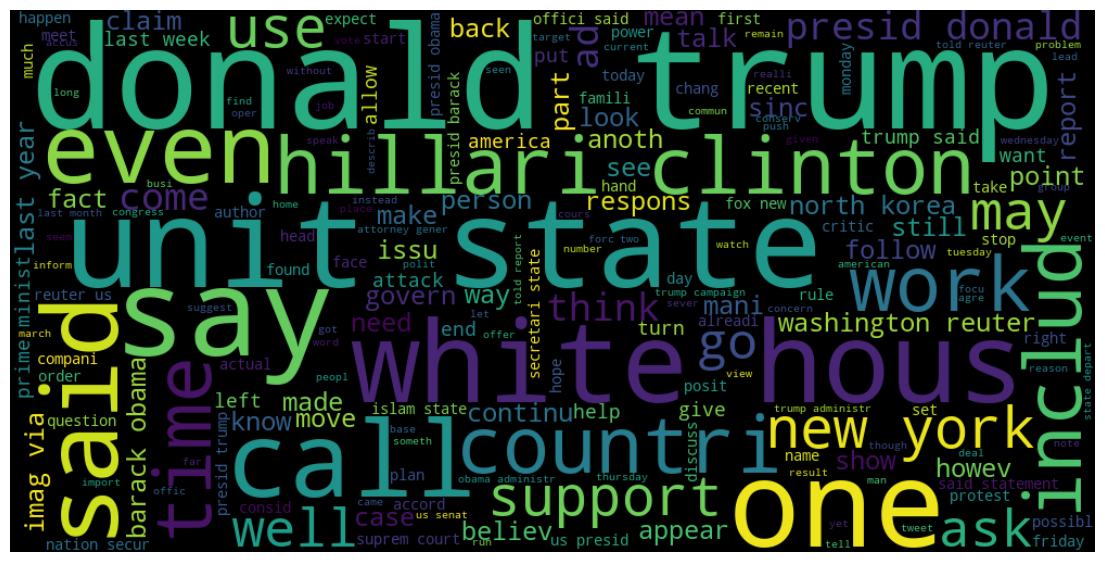

In [16]:
# Concatenate text data to string
text_str = ' '.join(data['text'])

# Generate & display wordCloud
wordCloud = WordCloud(width=1000, height=500)
plt.figure(figsize=(14, 10))
plt.imshow(wordCloud.generate(text_str), interpolation='bilinear')
plt.axis('off')
plt.show()

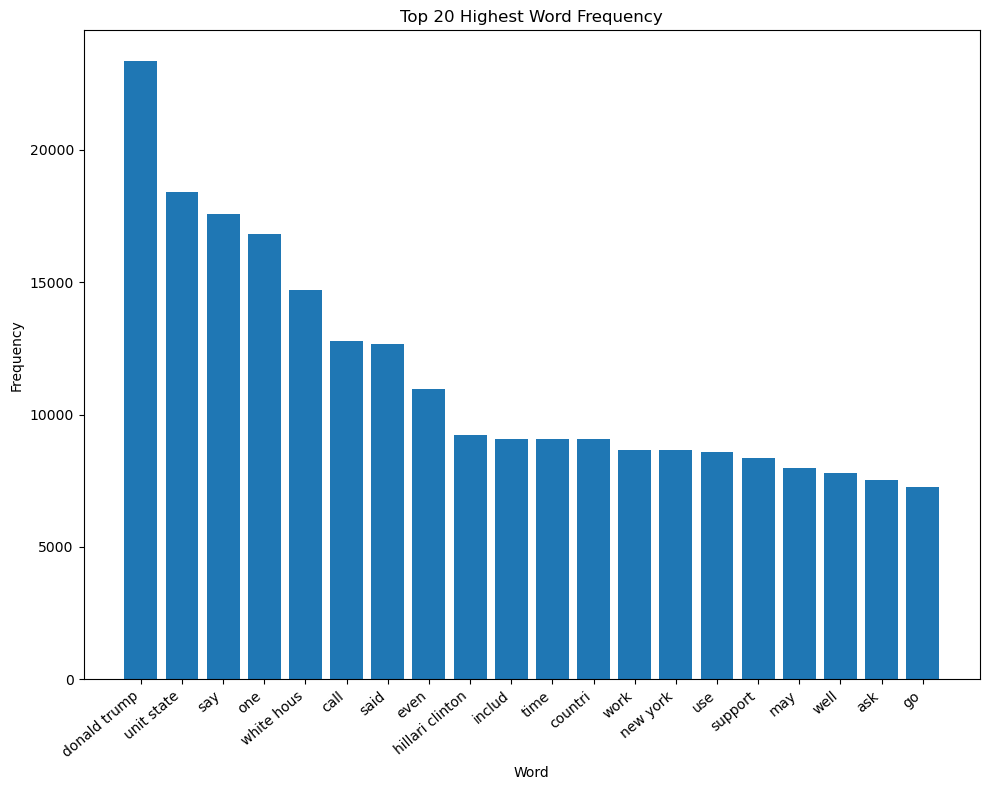

In [17]:
# Extract & fetch top 20 words of highest frequency
word_frequency = wordCloud.process_text(text_str)
word_top_frequency = dict(sorted(word_frequency.items(), key=lambda item: item[1], reverse=True)[:20])

# Display top 20 words & their respective frequency
plt.figure(figsize=(10, 8))
plt.bar(word_top_frequency.keys(), word_top_frequency.values())
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Highest Word Frequency')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()

### 2.2 Baseline Performance

For performance comparison, a simple baseline that predicts the majority class for all instances is utilised. This method assumes every news article in the dataset is classified as the majority class or fake news. Number of instances of majority class / Total number of instances = The baseline accuracy

In [18]:
# Calculate baseline accuracy
class_count = data['class'].value_counts()
data_count = len(data)
majority_class_count = class_count.max()
baseline_accuracy = majority_class_count / data_count

# Display baseline accuracy
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")

Baseline Accuracy: 0.52


In [19]:
# Reduce test size, less computation time
# Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['class'], test_size=0.1, random_state=42)

### 2.3 Comparative Classification Methodology

A comparison was conducted between a traditional statistical model, the Naive Bayes/ Logistic Regression classifier, and a modern deep learning model, the Long Short-Term Memory (LSTM) focusing on architecture, training and optimisation. The traditional statistical models demonstrated efficient training and quick prediction times, achieving competitive performance metrics. In contrast, LSTM required longer computational and training time, yielding results that while decent, highlighted the trade-offs between computational complexity and interpretability compared the to Naive Bayes/ Logistic Regression approach. This comparison underscores the overall superior performance and results of statistical models in the context of fake news detection.

In [20]:
# Create pipeline for Naive Bayes (BoW)
pipeline_nb_bow = Pipeline([('vectorizer', CountVectorizer(max_features=3000)),
                            ('classifier', MultinomialNB())
])

# Optimise hyperparameter with GridSearchCV
param_grid_nb_bow = {'classifier__alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}

# Perform GridSearch using Cross-Validation
grid_search_nb_bow = GridSearchCV(pipeline_nb_bow, param_grid=param_grid_nb_bow, cv=2, scoring='f1_weighted')
grid_search_nb_bow.fit(X_train, y_train)

print("Naive Bayes with Bag-of-Words (BoW)")
print()
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_nb_bow.best_params_)
# Print the best cross-validation score
print("Best Cross-Validation Score:", grid_search_nb_bow.best_score_)

# Evaluate the best model on testing dataset
y_pred_nb_bow = grid_search_nb_bow.predict(X_test)
f1_nb_bow = f1_score(y_test, y_pred_nb_bow)
# Print the F1 test score
print("F1 Score (Test):", f1_nb_bow)

Naive Bayes with Bag-of-Words (BoW)

Best Hyperparameters: {'classifier__alpha': 0.1}
Best Cross-Validation Score: 0.9405655714894687
F1 Score (Test): 0.9349744542498839


In [21]:
# Create pipeline for Naive Bayes (TF-IDF)
pipeline_nb_tfidf = Pipeline([('vectorizer', TfidfVectorizer(max_features=3000)),
                              ('classifier', MultinomialNB())
])

# Optimise hyperparameter with GridSearchCV
param_grid_nb_tfidf = {'classifier__alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}

# Perform GridSearch using Cross-Validation
grid_search_nb_tfidf = GridSearchCV(pipeline_nb_tfidf, param_grid=param_grid_nb_tfidf, cv=2, scoring='f1_weighted')
grid_search_nb_tfidf.fit(X_train, y_train)

print("Naive Bayes with Term Frequency-Inverse Document Frequency (TF-IDF)")
print()
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_nb_tfidf.best_params_)
# Print the best cross-validation score
print("Best Cross-Validation Score:", grid_search_nb_tfidf.best_score_)

# Evaluate the best model on testing dataset
y_pred_nb_tfidf = grid_search_nb_tfidf.predict(X_test)
f1_nb_tfidf = f1_score(y_test, y_pred_nb_tfidf)
# Print the F1 test score
print("F1 Score (Test):", f1_nb_tfidf)

Naive Bayes with Term Frequency-Inverse Document Frequency (TF-IDF)

Best Hyperparameters: {'classifier__alpha': 0.1}
Best Cross-Validation Score: 0.9245369043041756
F1 Score (Test): 0.9203664552501762


In [22]:
# Create pipeline for Logistic Regression (BoW)
pipeline_lg_bow = Pipeline([('vectorizer', CountVectorizer(max_features=3000)),
                            ('classifier', LogisticRegression(max_iter=500))
])

# Optimise hyperparameter with GridSearchCV
param_grid_lg_bow = {'classifier__penalty': ['l2'],
                     'classifier__C': [0.01, 0.1, 1, 10, 100],
                     'classifier__solver': ['liblinear', 'saga']
}

# Perform GridSearch using Cross-Validation
grid_search_lg_bow = GridSearchCV(pipeline_lg_bow, param_grid=param_grid_lg_bow, cv=2, scoring='f1_weighted')
grid_search_lg_bow.fit(X_train, y_train)

print("Logistic Regression with Bag-of-Words (BoW)")
print()
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_lg_bow.best_params_)
# Print the best cross-validation score
print("Best Cross-Validation Score:", grid_search_lg_bow.best_score_)

# Evaluate the best model on testing dataset
y_pred_lg_bow = grid_search_lg_bow.predict(X_test)
f1_lg_bow = f1_score(y_test, y_pred_lg_bow)
# Print the F1 test score
print("F1 Score (Test):", f1_lg_bow)

Logistic Regression with Bag-of-Words (BoW)

Best Hyperparameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best Cross-Validation Score: 0.9940361614607202
F1 Score (Test): 0.9941900999302812


In [23]:
# Create pipeline for Logistic Regression (TF-IDF)
pipeline_lg_tfidf = Pipeline([('vectorizer', TfidfVectorizer(max_features=3000)),
                              ('classifier', LogisticRegression(max_iter=500))
])

# Optimise hyperparameter with GridSearchCV
param_grid_lg_tfidf = {'classifier__penalty': ['l2'],
                       'classifier__C': [0.01, 0.1, 1, 10, 100],
                       'classifier__solver': ['liblinear', 'saga']
}

# Perform GridSearch using Cross-Validation
grid_search_lg_tfidf = GridSearchCV(pipeline_lg_tfidf, param_grid=param_grid_lg_tfidf, cv=2, scoring='f1_weighted')
grid_search_lg_tfidf.fit(X_train, y_train)

print("Logistic Regression with Term Frequency-Inverse Document Frequency (TF-IDF)")
print()
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_lg_tfidf.best_params_)
# Print the best cross-validation score
print("Best Cross-Validation Score:", grid_search_lg_tfidf.best_score_)

# Evaluate the best model on testing dataset
y_pred_lg_tfidf = grid_search_lg_tfidf.predict(X_test)
f1_lg_tfidf = f1_score(y_test, y_pred_lg_tfidf)
# Print the F1 test score
print("F1 Score (Test):", f1_lg_tfidf)

Logistic Regression with Term Frequency-Inverse Document Frequency (TF-IDF)

Best Hyperparameters: {'classifier__C': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best Cross-Validation Score: 0.9901013594499377
F1 Score (Test): 0.9939337377508166


In [24]:
# Create model comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Naive Bayes (BoW)',
              'Naive Bayes (TF-IDF)',
              'Logistic Regression (BoW)',
              'Logistic Regression (TF-IDF)'],
    'F1 Score (Test)': [f1_nb_bow, f1_nb_tfidf, f1_lg_bow, f1_lg_tfidf]
})

# Display model comparison dataframe
comparison_df

,Model,F1 Score (Test)
0,Naive Bayes (BoW),0.934974
1,Naive Bayes (TF-IDF),0.920366
2,Logistic Regression (BoW),0.994190
3,Logistic Regression (TF-IDF),0.993934


In [25]:
import os
import gensim.downloader as api

# Define paths
model_base_path = 'embedding_models'
os.makedirs(model_base_path, exist_ok=True)

word2vec_path = os.path.join(model_base_path, 'word2vec-google-news-300')
glove_path = os.path.join(model_base_path, 'glove-wiki-gigaword-300')
fasttext_path = os.path.join(model_base_path, 'fasttext-wiki-news-subwords-300')

# Load or download models
def download_model(model_name, model_path, download_func):
    if os.path.exists(model_path):
        print(f"Loading {model_name} from {model_path}...")
        model = api.load(model_name)
        print(f"Successfully loaded {model_name}")
    else:
        print(f"Downloading {model_name} from {model_path}...")
        try:
            model = download_func()
            model.save(model_path)
            print(f"Successfully downloaded {model_name}")
        except Exception as e:
            print(f"Failed to download {model_name}")
            model = None
    return model

word2vec_model = download_model('word2vec-google-news-300', word2vec_path, lambda: api.load('word2vec-google-news-300'))
glove_model = download_model('glove-wiki-gigaword-300', glove_path, lambda: api.load('glove-wiki-gigaword-300'))
fasttext_model = download_model('fasttext-wiki-news-subwords-300', fasttext_path, lambda: api.load('fasttext-wiki-news-subwords-300'))

Loading word2vec-google-news-300 from embedding_models/word2vec-google-news-300...
Successfully loaded word2vec-google-news-300
Loading glove-wiki-gigaword-300 from embedding_models/glove-wiki-gigaword-300...
Successfully loaded glove-wiki-gigaword-300
Loading fasttext-wiki-news-subwords-300 from embedding_models/fasttext-wiki-news-subwords-300...
Successfully loaded fasttext-wiki-news-subwords-300


In [26]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to fixed length
max_length = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# Print shapes
print(f"X_train_pad Shape: {X_train_pad}")
print()
print(f"X_test_pad Shape: {X_test_pad}")
print()

# Define function
def create_matrix(word_index, embedding_model, embedding_dim):
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        if word in embedding_model:
            embedding_matrix[i] = embedding_model[word]
        return embedding_matrix
        
# Define dimensions
word2vec_embedding_dimension = 300
glove_embedding_dimension = 300
fasttext_embedding_dimension = 300

# Define matrices
word2vec_embedding_matrix = create_matrix(tokenizer.word_index, word2vec_model, word2vec_embedding_dimension)
glove_embedding_matrix = create_matrix(tokenizer.word_index, glove_model, glove_embedding_dimension)
fasttext_embedding_matrix = create_matrix(tokenizer.word_index, fasttext_model, fasttext_embedding_dimension)

# Print shapes
print(f"Word2Vec Embedding Matrix Shape: {word2vec_embedding_matrix.shape}")
print(f"Glove Embedding Matrix Shape: {glove_embedding_matrix.shape}")
print(f"FastText Embedding Matrix Shape: {fasttext_embedding_matrix.shape}")

X_train_pad Shape: [[ 800   37  515 ...  208   92 2110]
 [   0    0    0 ...  879  797  898]
 [   0    0    0 ...  316 5306 4560]
 ...
 [1039  261    9 ... 7140  708  110]
 [   0    0    0 ... 2312 9704    1]
 [ 692  292  754 ... 1684  486 1042]]

X_test_pad Shape: [[    0     0     0 ...   782     1    96]
 [    0     0     0 ...   114  1657    85]
 [    0     0     0 ...    85   114  1670]
 ...
 [    0     0     0 ...   694  7090  7091]
 [    0     0     0 ...  1068   788  2463]
 [12181  1182  2541 ...  1502  1383   595]]

Word2Vec Embedding Matrix Shape: (173051, 300)
Glove Embedding Matrix Shape: (173051, 300)
FastText Embedding Matrix Shape: (173051, 300)


In [27]:
# Define in-memory storage
store_results = {
    "word2vec": {"best_f1_weighted": None, "best_params": None},
    "glove": {"best_f1_weighted": None, "best_params": None},
    "fasttext": {"best_f1_weighted": None, "best_params": None},
}

# Create load & save results functions
def load_results(model_name):
    return store_results[model_name]["best_f1_weighted"], store_results[model_name]["best_params"]

def save_results(model_name, best_f1_weighted, best_params):
    store_results[model_name] = {"best_f1_weighted": best_f1_weighted, "best_params": best_params}

# Create LSTM model function
def create_lstm(embedding_matrix, embedding_dim, units, dropout_rate, recurrent_dropout_rate):
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0],
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=200,
                        trainable=False))
    model.add(LSTM(units, dropout=dropout_rate, recurrent_dropout=recurrent_dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define hyperparameters
units = 32 # Fixed
dropout_rate_list = [0.2, 0.3, 0.4]
recurrent_dropout_rate_list = [0.2, 0.3, 0.4]
batch_size = 256 # Fixed
epochs = 10 # Reduced (increased computation speed)
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Manual cross-validation & hyperparameter tuning
def manual_tuning_lstm(X, y, embedding_matrix, embedding_dim):
    best_f1_weighted = 0
    best_params = {}
    kf = KFold(n_splits=2, shuffle=True, random_state=42)
    
    for dropout_rate in dropout_rate_list:
        for recurrent_dropout_rate in recurrent_dropout_rate_list:
            f1_scores = []
            for train_index, val_index in kf.split(X):
                X_train, X_val = X[train_index], X[val_index]
                y_train, y_val = y[train_index], y[val_index]
                
                model = create_lstm(embedding_matrix, embedding_dim, units, dropout_rate, recurrent_dropout_rate)
                model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)
                
                y_pred = (model.predict(X_val) > 0.5).astype("int32")
                f1_scores.append(f1_score(y_val, y_pred, average='weighted'))
                
            avg_f1_weighted = np.mean(f1_scores)
            if avg_f1_weighted > best_f1_weighted:
                best_f1_weighted = avg_f1_weighted
                best_params = {'dropout_rate': dropout_rate,
                               'recurrent_dropout_rate': recurrent_dropout_rate}
                print(f"F1 Weighted: {avg_f1_weighted} | Parameters: {dropout_rate}, {recurrent_dropout_rate}")
    return best_f1_weighted, best_params
            
def tune_hyperparameters(X, y, embedding_matrix, embedding_dim, model_name, retrain=False):
    best_f1_weighted, best_params = load_results(model_name)
    
    if not retrain and best_f1_weighted is not None and best_params is not None:
        print(f"Loaded {model_name} existing results")
        return best_f1_weighted, best_params
    
    print("In-Progress...")
    best_f1_weighted, best_params = manual_tuning_lstm(X, y, embedding_matrix, embedding_dim)
    save_results(model_name, best_f1_weighted, best_params)
    return best_f1_weighted, best_params

X_train_pad = np.array(X_train_pad)
y_train = np.array(y_train)

In [28]:
# Word2Vec hyperparameter tuning
print("Word2Vec Embeddings Hyperparameter Tuning")
best_f1_weighted_word2vec, best_params_word2vec = tune_hyperparameters(X_train_pad, y_train, word2vec_embedding_matrix, word2vec_embedding_dimension, model_name="word2vec", retrain=False)
print("Word2Vec Best F1 Weighted: ", best_f1_weighted_word2vec)
print("Word2Vec Best Parameters: ", best_params_word2vec)

Word2Vec Embeddings Hyperparameter Tuning
In-Progress...
632/632 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
F1 Weighted: 0.7732047880668262 | Parameters: 0.2, 0.2
632/632 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step
Word2Vec Best F1 Weighted:  0.7732047880668262
Word2Vec Best Parameters:  {'dropout_rate': 0.2, 'recurrent_dropout

In [29]:
# GloVe hyperparameter tuning
print("GloVe Embeddings Hyperparameter Tuning")
best_f1_weighted_glove, best_params_glove = tune_hyperparameters(X_train_pad, y_train, glove_embedding_matrix, glove_embedding_dimension, model_name="glove", retrain=False)
print("GloVe Best F1 Weighted: ", best_f1_weighted_glove)
print("GloVe Best Parameters: ", best_params_glove)

GloVe Embeddings Hyperparameter Tuning
In-Progress...
632/632 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step
F1 Weighted: 0.7633424227989296 | Parameters: 0.2, 0.2
632/632 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step
F1 Weighted: 0.7648340253109935 | Parameters: 0.3, 0.2
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step
GloVe Best F1 Weighted:  0.7648340253109935
GloVe Best Paramet

In [30]:
# FastText hyperparameter tuning
print("FastText Embeddings Hyperparameter Tuning")
best_f1_weighted_fasttext, best_params_fasttext = tune_hyperparameters(X_train_pad, y_train, fasttext_embedding_matrix, fasttext_embedding_dimension, model_name="fasttext", retrain=False)
print("FastText Best F1 Weighted: ", best_f1_weighted_fasttext)
print("FastText Best Parameters: ", best_params_fasttext)

FastText Embeddings Hyperparameter Tuning
In-Progress...
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
F1 Weighted: 0.7611650273162653 | Parameters: 0.2, 0.2
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step
F1 Weighted: 0.7644694266233806 | Parameters: 0.2, 0.3
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step
F1 Weighted: 0.7652916304072753 | Parameters: 0.3, 0.2
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step
F1 Weighted: 0.7684902050156124 | Parameters: 0.4, 0.2
632/632 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 12s 19

In [31]:
# Evaluate LSTM model function
def evaluate_lstm(X_train, y_train, X_test, y_test, embedding_matrix, embedding_dim, best_params):
    print("Building LSTM Model...")
    model = create_lstm(embedding_matrix,
                        embedding_dim,
                        units=units,
                        dropout_rate=best_params['dropout_rate'],
                        recurrent_dropout_rate=best_params['recurrent_dropout_rate'])
    
    print("Fitting LSTM Model...")
    model.fit(X_train,
              y_train,
              epochs=epochs,
              batch_size=batch_size,
              validation_split=0.1,
              callbacks=[early_stopping],
              verbose=0)
    print("Predicting with LSTM Model...")
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    if len(y_pred) != len(y_test):
        raise ValueError(f"Length of y_pred ({len(y_pred)}) does not match length of y_test ({len(y_test)})")
        
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    return f1_weighted

In [32]:
# Word2Vec model evaluation
print("Word2Vec Embeddings Model Evaluation with Test Data")
f1_weighted_word2vec = evaluate_lstm(X_train_pad, y_train, X_test_pad, y_test, word2vec_embedding_matrix, word2vec_embedding_dimension, best_params_word2vec)
print("Word2Vec F1 Weighted: ", f1_weighted_word2vec)

Word2Vec Embeddings Model Evaluation with Test Data
Building LSTM Model...
Fitting LSTM Model...
Predicting with LSTM Model...
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
Word2Vec F1 Weighted:  0.7557876269590706


In [33]:
# GloVe model evaluation
print("GloVe Embeddings Model Evaluation with Test Data")
f1_weighted_glove = evaluate_lstm(X_train_pad, y_train, X_test_pad, y_test, glove_embedding_matrix, glove_embedding_dimension, best_params_glove)
print("GloVe F1 Weighted: ", f1_weighted_glove)

GloVe Embeddings Model Evaluation with Test Data
Building LSTM Model...
Fitting LSTM Model...
Predicting with LSTM Model...
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
GloVe F1 Weighted:  0.7624935362010445


In [34]:
# FastText model evaluation
print("FastText Embeddings Model Evaluation with Test Data")
f1_weighted_fasttext = evaluate_lstm(X_train_pad, y_train, X_test_pad, y_test, fasttext_embedding_matrix, fasttext_embedding_dimension, best_params_fasttext)
print("FastText F1 Weighted: ", f1_weighted_fasttext)

FastText Embeddings Model Evaluation with Test Data
Building LSTM Model...
Fitting LSTM Model...
Predicting with LSTM Model...
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
FastText F1 Weighted:  0.7756125533196988


## 3.0 Conclusion

### 3.1 Performance Analysis and Comparative Discussion

The dataframe summarises the performance metrics for Naive Bayes, Logistic Regression and LSTM models using different feature representations and hypeparameters. With statistical models, Naive Bayes has shown overall solid performance but slightly lower F1 Score compared to Logistic Regression. Naive Bayes (BoW) has achieved 93.50% on the test set while Naive Bayes (TF-IDF) has achieved 92.04%. Though computationally efficient, it assumes independence among features which limits their ability to capture relationships via text. On the other hand, Logistic Regression consistently outperforms Naive Bayes. Logistic Regression (BoW) achieved an impressive F1 Score of 99.42% on the test set while Logistic Regression (TF-IDF) follows closely at 99.39%. This proves its suitability for the fake news classification task at hand. For LSTM models, utilising Word2Vec, GloVe and FastText embeddings resulted in low F1 Scores of 76.37%, 77.13% and 76.64% respectively. Compared to statistical models, it suggests challenges leveraging the embeddings effectively for this fake news detection task possibly due to naunces in contextual understanding. From this dataframe, it can be concluded that statistical models are the preferred choice for fake news detection where Logistic Regression stands out the most for its high efficiency and performance.

In [35]:
# Create function to append results
def append_results(model_type, features, parameters, val_accuracy, test_accuracy):
    results.append({'Model': model_type,
                    'Feature': features,
                    'Hyperparameters': parameters,
                    'F1 Score (Validation)': val_accuracy,
                    'F1 Score (Test)': test_accuracy})

# Create function to display results
def display_results():
    results_df = pd.DataFrame(results)
    return results_df

In [36]:
# Initialise
results = []

# Naive Bayes (BoW)
append_results('Naive Bayes', 'BoW', grid_search_nb_bow.best_params_, grid_search_nb_bow.best_score_, f1_nb_bow)
# Naive Bayes (TF-IDF)
append_results('Naive Bayes', 'TF-IDF', grid_search_nb_tfidf.best_params_, grid_search_nb_tfidf.best_score_, f1_nb_tfidf)
# Logistic Regression (BoW)
append_results('Logistic Regression', 'BoW', grid_search_lg_bow.best_params_, grid_search_lg_bow.best_score_, f1_lg_bow)
# Logistic Regression (TF-IDF)
append_results('Logistic Regression', 'TF-IDF', grid_search_lg_tfidf.best_params_, grid_search_lg_tfidf.best_score_, f1_lg_tfidf)

# LSTM (Word2Vec)
append_results('LSTM', 'Word2Vec', best_params_word2vec, best_f1_weighted_word2vec, f1_weighted_word2vec)
# LSTM (GloVe)
append_results('LSTM', 'GloVe', best_params_glove, best_f1_weighted_glove, f1_weighted_glove)
# LSTM (FastTest)
append_results('LSTM', 'FastTest', best_params_fasttext, best_f1_weighted_fasttext, f1_weighted_fasttext)

# Display results
display_results()

,Model,Feature,Hyperparameters,F1 Score (Validation),F1 Score (Test)
0,Naive Bayes,BoW,{'classifier__alpha': 0.1},0.940566,0.934974
1,Naive Bayes,TF-IDF,{'classifier__alpha': 0.1},0.924537,0.920366
2,Logistic Regression,BoW,"{'classifier__C': 0.1, 'classifier__penalty': ...",0.994036,0.994190
3,Logistic Regression,TF-IDF,"{'classifier__C': 100, 'classifier__penalty': ...",0.990101,0.993934
4,LSTM,Word2Vec,"{'dropout_rate': 0.2, 'recurrent_dropout_rate'...",0.773205,0.755788
5,LSTM,GloVe,"{'dropout_rate': 0.3, 'recurrent_dropout_rate'...",0.764834,0.762494
6,LSTM,FastTest,"{'dropout_rate': 0.4, 'recurrent_dropout_rate'...",0.768490,0.775613


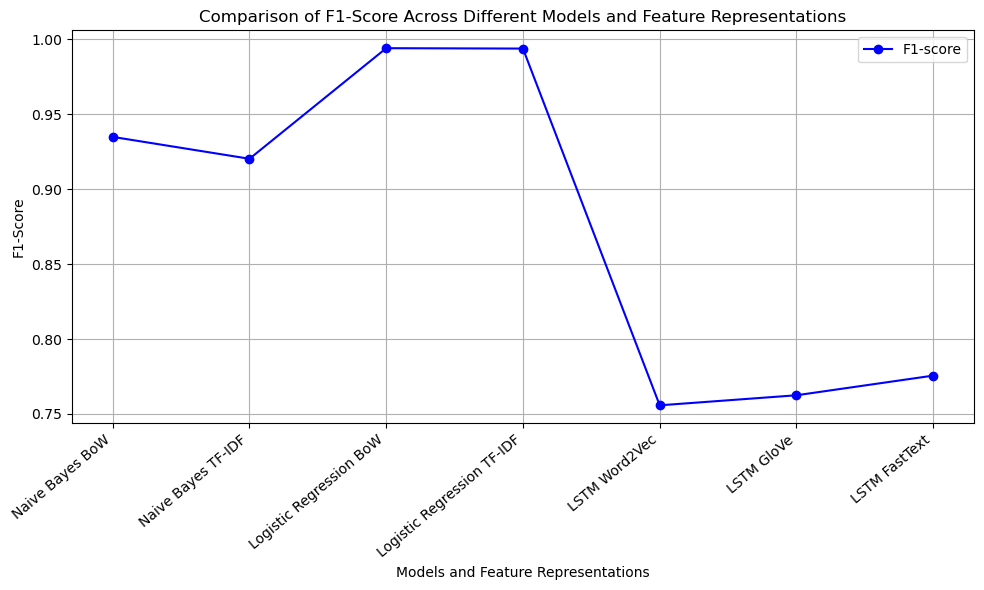

In [38]:
# Initialise lists
models = []
f1_scores = []

# Append results for Naive Bayes (BoW)
models.append('Naive Bayes BoW')
f1_scores.append(f1_nb_bow)
# Append results for Naive Bayes (TF-IDF)
models.append('Naive Bayes TF-IDF')
f1_scores.append(f1_nb_tfidf)
# Append results for Logistic Regression (BoW)
models.append('Logistic Regression BoW')
f1_scores.append(f1_lg_bow)
# Append results for Logistic Regression (TF-IDF)
models.append('Logistic Regression TF-IDF')
f1_scores.append(f1_lg_tfidf)

# Append results for LSTM (Word2Vec)
models.append('LSTM Word2Vec')
f1_scores.append(f1_weighted_word2vec)
# Append results for LSTM (GloVe)
models.append('LSTM GloVe')
f1_scores.append(f1_weighted_glove)
# Append results for LSTM (FastText)
models.append('LSTM FastText')
f1_scores.append(f1_weighted_fasttext)

# Display the plot
plt.figure(figsize=(10, 6))
plt.plot(models, f1_scores, marker='o', linestyle='-', color='b', label='F1-score')
plt.xticks(rotation=40, ha='right')
plt.xlabel('Models and Feature Representations')
plt.ylabel('F1-Score')
plt.title('Comparison of F1-Score Across Different Models and Feature Representations')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 3.2 Project Summary and Reflection

Model Learning and Natural Language Processing has been an interesting module to explore. While the methodologies and insights are transferable, adaptations would involve domain-specific preprocessing and suitable model hyperparameter tuning to optimise model performance and relevance. In conclusion, this learning experience highlights the importance of selecting appropriate models depending on the task requirements and specific dataset characteristics. This DADT coursework has allowed me to implement and evaluate many different models, revealing the distinct strengths and weaknesses across statistical and embedding-based approaches. It has been an insightful journey that has allowed me to better understand how to develop solutions for practical real-world issues.

### 3.3 References

[1] Nirvana, Noshin, et al. Detection of Fake News Using Machine Learning and Natural Language Processing Algorithms. Journal of Advances in Information Technology Vol 13, 2022.

[2] Tsai, Chih-Ming. Stylometric Fake News Detection Based on Natural Language Processing Using Named Entity Recognition: In-Domain and Cross-Domain Analysis. Data Push and Data Mining in the Age of Artificial Intelligence, 2023.

[3] Traylor, Terry, et al. Classifying Fake News Articles Using Natural Language Processing to Identify In-Article Attribution as a Supervised Learning Estimator, 2019.